<a href="https://colab.research.google.com/github/beryamosta/MLFloorPlan/blob/main/MLFloorPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [54]:
class Model(nn.Module):
  # input layer
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x


In [55]:
# for randomization
torch.manual_seed(41)
# create a instance
model = Model()

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
url= 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [59]:
# train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']
X = X.values
y = y.values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)



In [61]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [62]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [63]:
criterion = nn.CrossEntropyLoss()
# choose Adam omptimizer lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [64]:
#train the model
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  # measure the loss
  loss = criterion(y_pred, y_train)# predicted value vs trained values
  # keep track our losses
  losses.append(loss.detach().numpy())
  # print evey 10 epoch
  if i % 10 == 0:
    print(f'epoch : {i} and loss : {loss}')
  # do some back propagation : take the error rate of forward and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch : 0 and loss : 1.1251550912857056
epoch : 10 and loss : 1.0096259117126465
epoch : 20 and loss : 0.8157405853271484
epoch : 30 and loss : 0.585706353187561
epoch : 40 and loss : 0.3999636471271515
epoch : 50 and loss : 0.26768800616264343
epoch : 60 and loss : 0.17942361533641815
epoch : 70 and loss : 0.12151690572500229
epoch : 80 and loss : 0.0860118493437767
epoch : 90 and loss : 0.06520850956439972


Text(0.5, 0, 'epoch')

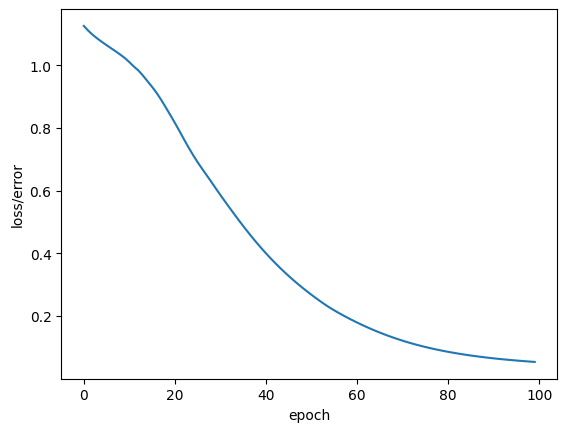

In [65]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('epoch')